Green is negative financial service export from HK 2018-19 AND positive financial service export from SG 2018-19 

In [1]:
# % of Exports is in Financial services
# Country	Most Recent Year	Most Recent Value	
# Hong Kong SAR, China	2018	22	
# Singapore	2018	18

In [2]:
# plot of top 10 trading partners of financial services, to see how money shifted
# retain original mapping/location
# general HK situ: increase in green, decrease in red
# specifically HK to SG: HK retain green, SG gain red

In [72]:
top=75
threshold=2

import pandas as pd
financialservices_HK = pd.read_csv("financialservices_HK.csv", encoding='latin-1')
financialservices_SG = pd.read_csv("financialservices_SG.csv", encoding='latin-1')

merged_df = pd.merge(financialservices_HK, financialservices_SG, on='Importers', suffixes=('_HK', '_SG'))
joined_df = merged_df[1:].head(top) # top 10 overlapping financial services consumers for HK & SG by Export value

HK_to_SG = financialservices_HK[financialservices_HK['Importers']=='Singapore']
SG_to_HK = financialservices_SG[financialservices_SG['Importers']=='Hong Kong, China']


In [15]:
joined_df.columns[1]
list(range(1,10+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [16]:
joined_df.columns[-10]

'Exported value in 2010_SG'

In [17]:
HK_to_SG.columns[10]

'Exported value in 2019'

In [18]:
SG_to_HK.columns[10]

'Exported value in 2019'

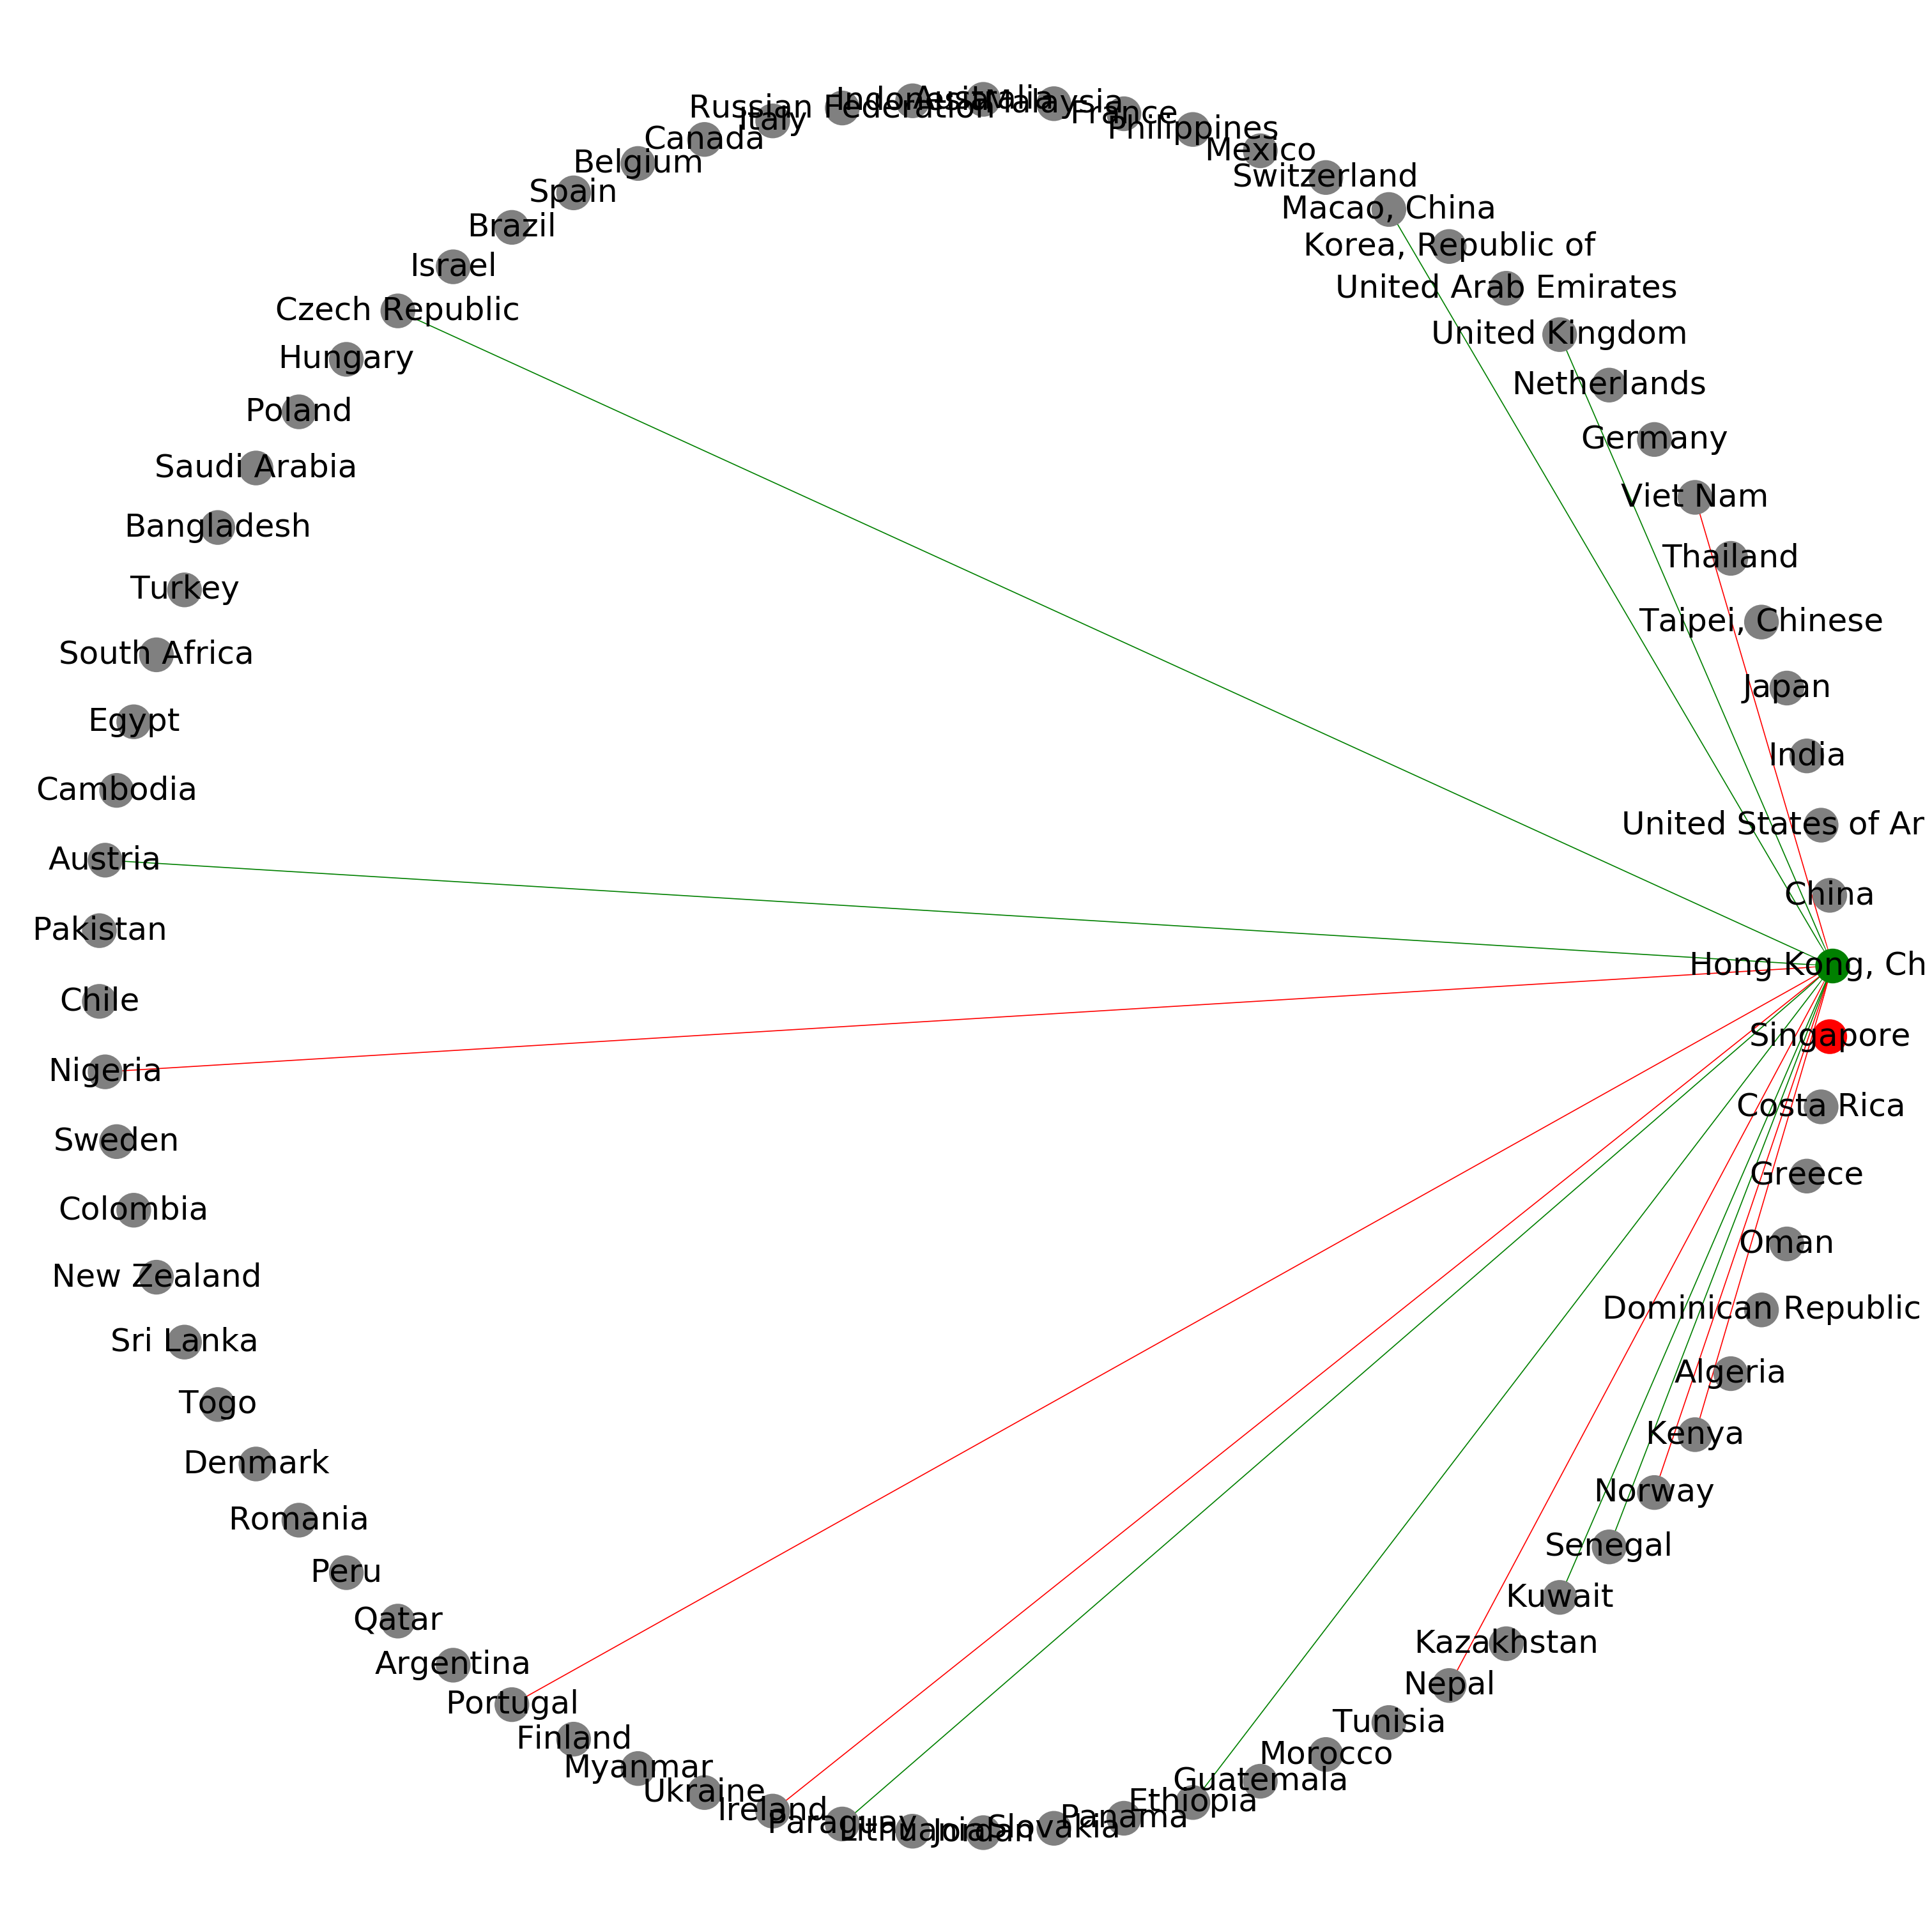

In [73]:
# HK, 2010 to 2019, Green is negative financial service export from HK 2018-19 AND positive financial service export from SG 2018-19
# control

colourTony = 'black'
colourTony = 'white'

import networkx as nx 
import matplotlib.pyplot as plt
import itertools

from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 25), dpi=120, facecolor='w', edgecolor='k')

G = nx.Graph() 
# G1 = nx.Graph()
# adj_list = {2: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 3: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 5: [2, 3, 4, 5, 6, 7, 8, 9]}
# import matplotlib.pyplot as plt 
# for i, j in adj_list.items():
#     for k in j:
#         G.add_edge(i, k)  

for index, row in joined_df.iterrows():
    G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color=colourTony)
    if row[joined_df.columns[10]]-row[joined_df.columns[9]]>0:
        if row[joined_df.columns[-1]]-row[joined_df.columns[-2]]<=0:
            counter=0
            for i in list(range(1,10+1)):
                if row[joined_df.columns[i]]-row[joined_df.columns[i-12+1]]>0:
                    counter+=1
            if counter>=threshold:
                G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color='green')
    if row[joined_df.columns[10]]-row[joined_df.columns[9]]<=0:
        if row[joined_df.columns[-1]]-row[joined_df.columns[-2]]>0:
            counter=0
            for i in list(range(1,10+1)):
                if row[joined_df.columns[i]]-row[joined_df.columns[i-12+1]]<=0:
                    counter+=1
            if counter>=threshold:
                G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color='red')
#     else:
#         G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color='black')
    
G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color=colourTony)
if HK_to_SG.iloc[0,10]-HK_to_SG.iloc[0,9]>0:
    if SG_to_HK.iloc[0,10]-SG_to_HK.iloc[0,9]<=0:
        counter=0
        for i in list(range(1,10+1)):
            if HK_to_SG.iloc[0,i]-SG_to_HK.iloc[0,i]>0:
                counter+=1
        if counter>=threshold:
            G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='green')
if HK_to_SG.iloc[0,10]-HK_to_SG.iloc[0,9]<=0:
    if SG_to_HK.iloc[0,10]-SG_to_HK.iloc[0,9]>0:
        counter=0
        for i in list(range(1,10+1)):
            if HK_to_SG.iloc[0,i]-SG_to_HK.iloc[0,i]<=0:
                counter+=1
        if counter>=threshold:
            G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='red')
# G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='red')
    
# G.add_edge(1,2, weight=1)

color_map = []
for node in G:
    if node == "Hong Kong, China":
        color_map.append('green')
    
    else:
        if node == "Singapore":
            color_map.append('red')
        else:
            color_map.append('grey')


# nx.draw(G, pos=pos, with_labels=True, node_size = 1000, font_size=10, edges=edges, node_color = color_map)

# pos = nx.spring_layout(G, k=0.15,iterations=50)
pos = nx.circular_layout(G)
# pos = nx.spring_layout(G, scale=5,k=0.15,iterations=20)   #<<<<<<<<<< Initialize this only once
# nx.draw(G,pos=pos, with_labels=True, node_size = 1000, font_size=10)  #<<<<<<<<< pass the pos variable
# plt.draw() 
# plt.figure() # To plot the next graph in a new figure
# plt.show()

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos=pos, with_labels=True, node_size = 1000, font_size=30, edges=edges, edge_color=colors, node_color = color_map)

In [10]:
# # HK, 2010 to 2019, Green is negative financial service export from HK 2018-19 AND positive financial service export from SG 2018-19
# # control

# # colourTony = 'black'
# colourTony = 'white'

# import networkx as nx 
# import matplotlib.pyplot as plt
# import itertools

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(20, 20), dpi=120, facecolor='w', edgecolor='k')

# G = nx.Graph() 
# # G1 = nx.Graph()
# # adj_list = {2: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# # 3: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# # 5: [2, 3, 4, 5, 6, 7, 8, 9]}
# # import matplotlib.pyplot as plt 
# # for i, j in adj_list.items():
# #     for k in j:
# #         G.add_edge(i, k)  

# for index, row in joined_df.iterrows():
#     G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color=colourTony, fontsize=10)
#     if row[joined_df.columns[10]]-row[joined_df.columns[9]]>0:
#         if row[joined_df.columns[-1]]-row[joined_df.columns[-2]]<=0:
#             counter=0
#             for i in list(range(1,10+1)):
#                 if row[joined_df.columns[i]]-row[joined_df.columns[i-12+1]]>0:
#                     counter+=1
#             if counter>=threshold:
#                 G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color='green', fontsize=20)
#     if row[joined_df.columns[10]]-row[joined_df.columns[9]]<=0:
#         if row[joined_df.columns[-1]]-row[joined_df.columns[-2]]>0:
#             counter=0
#             for i in list(range(1,10+1)):
#                 if row[joined_df.columns[i]]-row[joined_df.columns[i-12+1]]<=0:
#                     counter+=1
#             if counter>=threshold:
#                 G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color='red', fontsize=20)
# #     else:
# #         G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color='black')
    
# G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color=colourTony, fontsize=10)
# if HK_to_SG.iloc[0,10]-HK_to_SG.iloc[0,9]>0:
#     if SG_to_HK.iloc[0,10]-SG_to_HK.iloc[0,9]<=0:
#         counter=0
#         for i in list(range(1,10+1)):
#             if HK_to_SG.iloc[0,i]-SG_to_HK.iloc[0,i]>0:
#                 counter+=1
#         if counter>=threshold:
#             G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='green', fontsize=20)
# if HK_to_SG.iloc[0,10]-HK_to_SG.iloc[0,9]<=0:
#     if SG_to_HK.iloc[0,10]-SG_to_HK.iloc[0,9]>0:
#         counter=0
#         for i in list(range(1,10+1)):
#             if HK_to_SG.iloc[0,i]-SG_to_HK.iloc[0,i]<=0:
#                 counter+=1
#         if counter>=threshold:
#             G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='red', fontsize=20)
# # G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='red')
    
# # G.add_edge(1,2, weight=1)

# # pos = nx.spring_layout(G, k=0.15,iterations=50)
# pos = nx.circular_layout(G)
# # pos = nx.spring_layout(G, scale=5,k=0.15,iterations=20)   #<<<<<<<<<< Initialize this only once
# # nx.draw(G,pos=pos, with_labels=True, node_size = 1000, font_size=10)  #<<<<<<<<< pass the pos variable
# # plt.draw() 
# # plt.figure() # To plot the next graph in a new figure
# # plt.show()

# edges = G.edges()
# colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]
# fontsizes = [G[u][v]['fontsize'] for u,v in edges]

# nx.draw(G, pos=pos, with_labels=True, node_size = 1000, font_size=fontsizes, edges=edges, edge_color=colors)

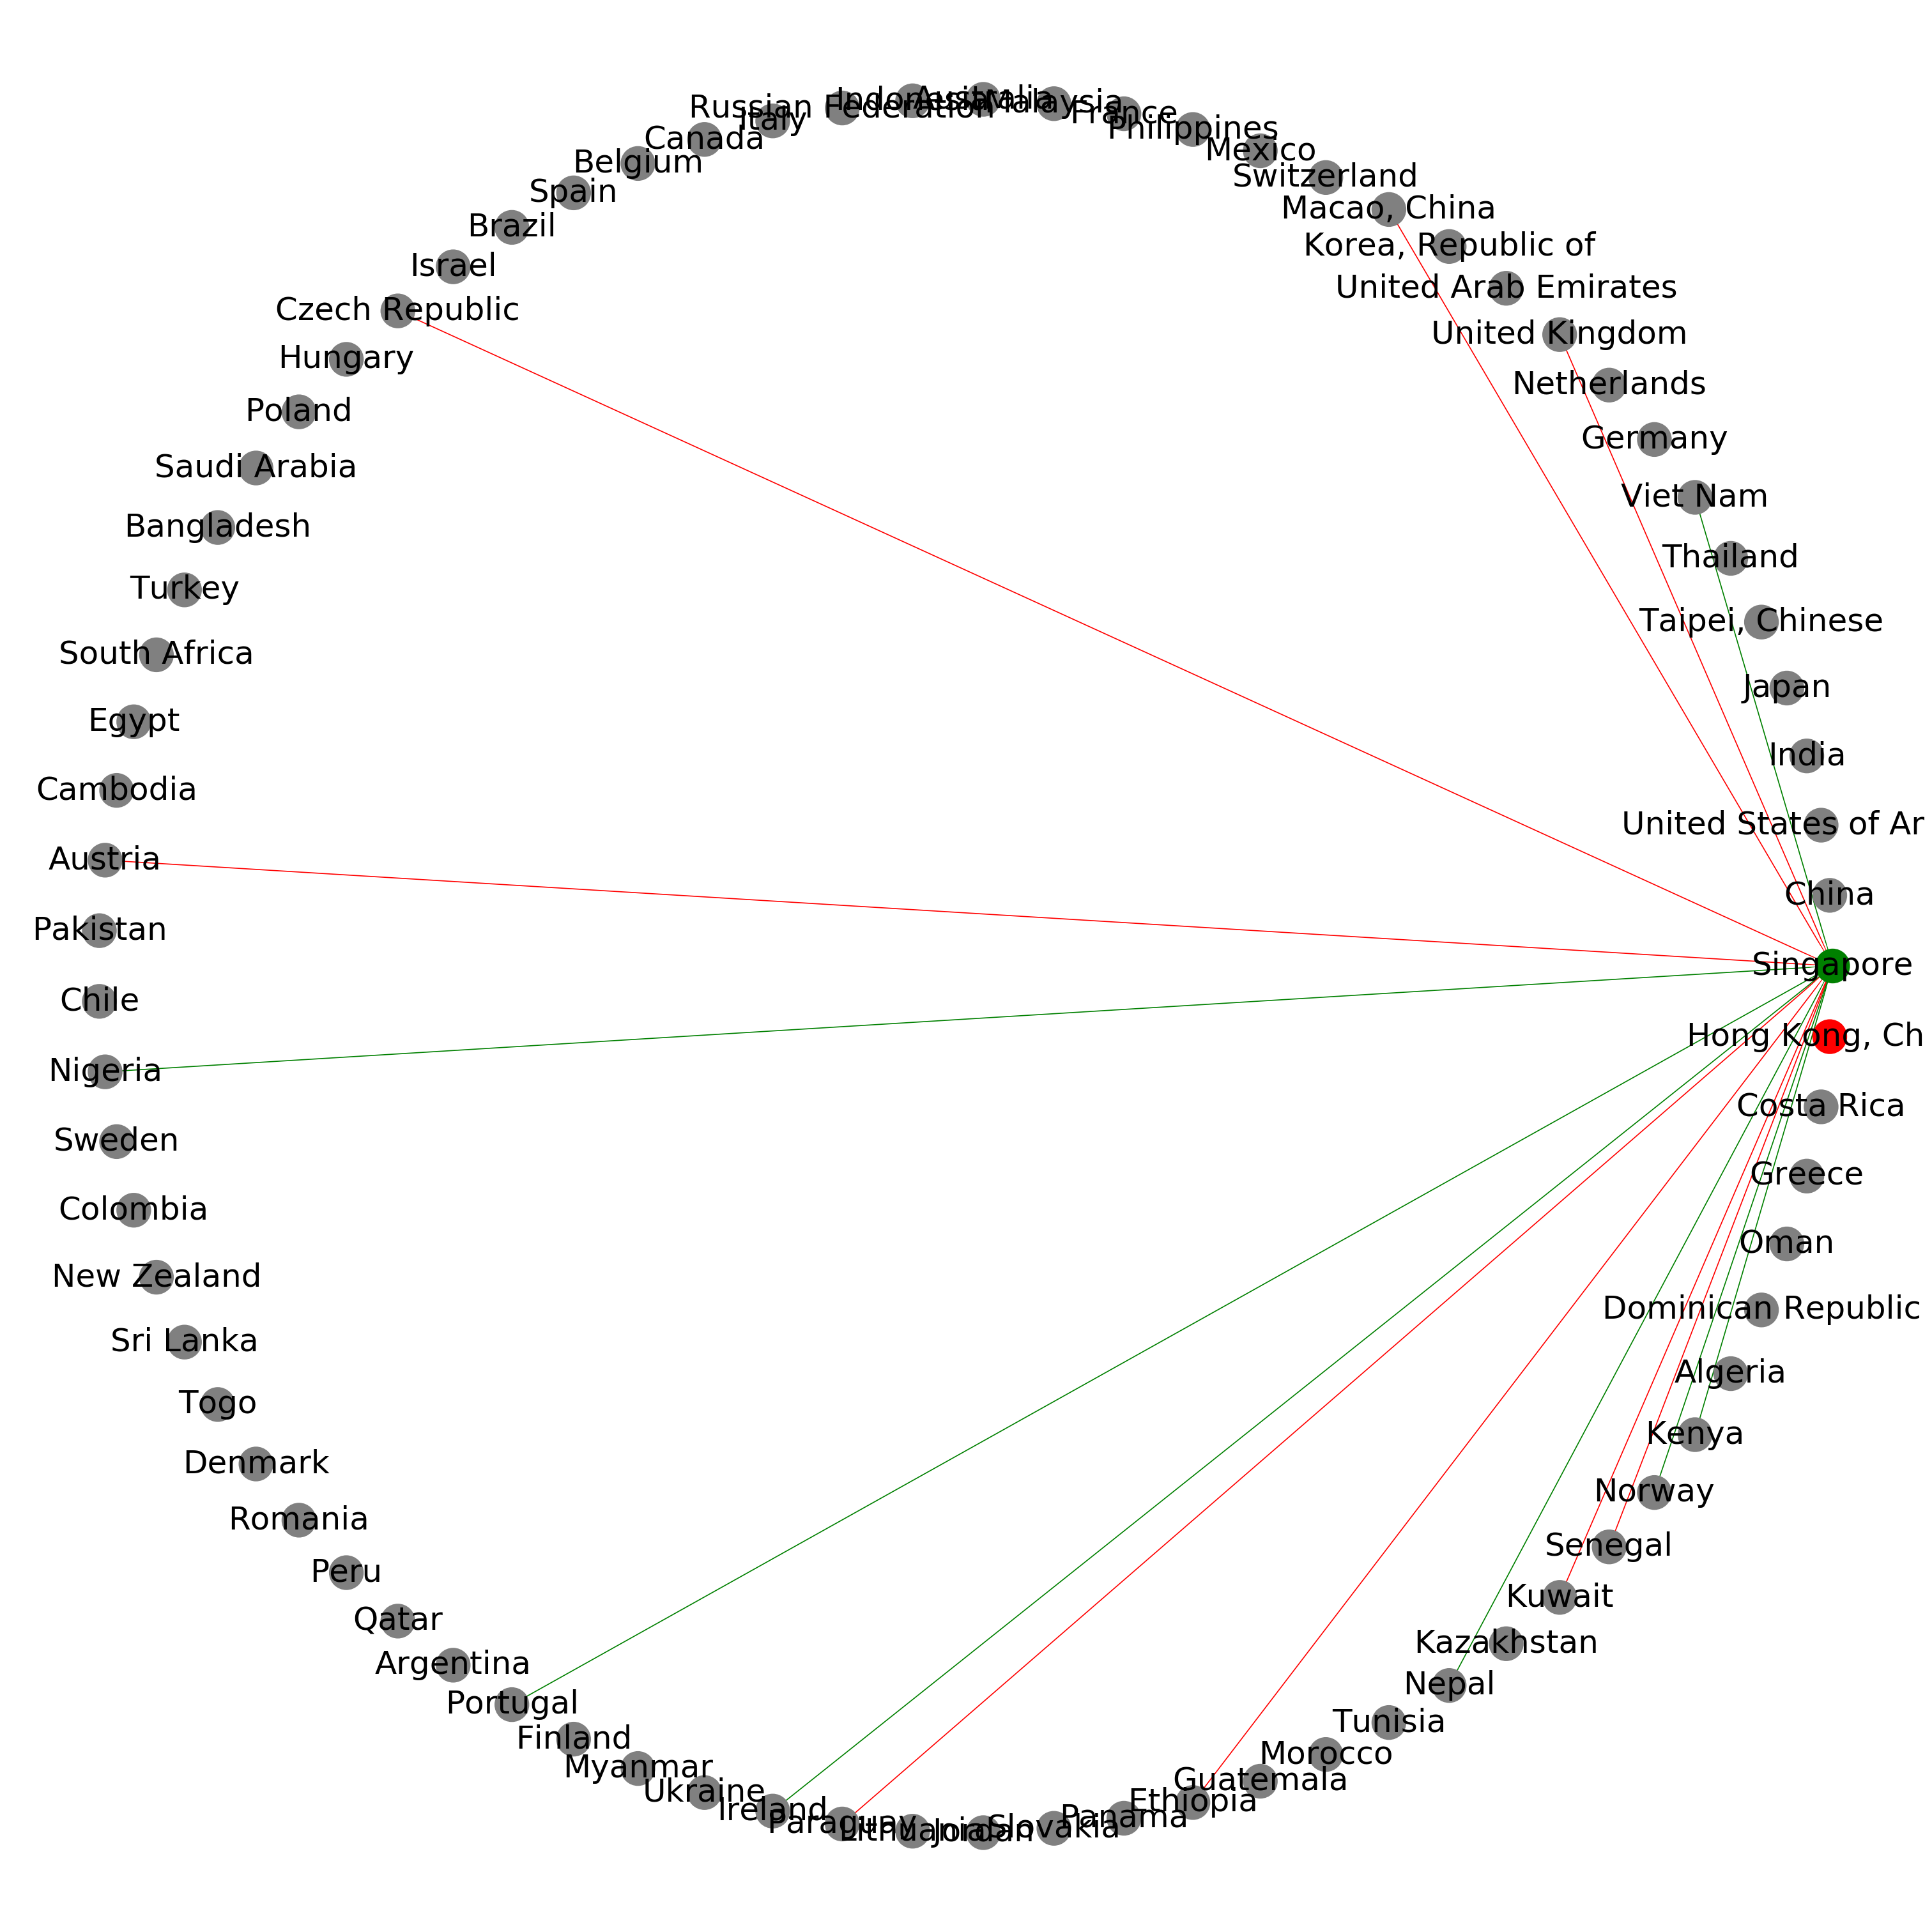

In [77]:
# SG, 2010 to 2019, Green is negative financial service export from HK 2018-19 AND positive financial service export from SG 2018-19
# control

colourTony = 'black'
colourTony = 'white'

count=0
total=0

import networkx as nx 
import matplotlib.pyplot as plt
import itertools

from matplotlib.pyplot import figure
figure(num=None, figsize=(25, 25), dpi=120, facecolor='w', edgecolor='k')

G = nx.Graph() 
# G1 = nx.Graph()
# adj_list = {2: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 3: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 5: [2, 3, 4, 5, 6, 7, 8, 9]}
# import matplotlib.pyplot as plt 
# for i, j in adj_list.items():
#     for k in j:
#         G.add_edge(i, k)  

for index, row in joined_df.iterrows():
    total+=1
    G.add_edge("Singapore",row[joined_df.columns[0]], weight=row[joined_df.columns[-1]], color=colourTony)
    if row[joined_df.columns[-1]]-row[joined_df.columns[-2]]>0:
        if row[joined_df.columns[10]]-row[joined_df.columns[9]]<=0:
            counter=0
            for i in list(range(1,10+1)):
                if row[joined_df.columns[i]]-row[joined_df.columns[i-12+1]]<=0:
                    counter+=1
            if counter>=threshold:
                G.add_edge("Singapore",row[joined_df.columns[0]], weight=row[joined_df.columns[-1]], color='green')
                count+=1
    if row[joined_df.columns[-1]]-row[joined_df.columns[-2]]<=0:
        if row[joined_df.columns[10]]-row[joined_df.columns[9]]>0:
            counter=0
            for i in list(range(1,10+1)):
                if row[joined_df.columns[i]]-row[joined_df.columns[i-12+1]]>0:
                    counter+=1
            if counter>=threshold:
                G.add_edge("Singapore",row[joined_df.columns[0]], weight=row[joined_df.columns[-1]], color='red')
#     else:
#         G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color='black')
    
G.add_edge("Singapore",SG_to_HK.iloc[0,0], weight=SG_to_HK.iloc[0,10], color=colourTony)
if SG_to_HK.iloc[0,10]-SG_to_HK.iloc[0,9]>0:
    if HK_to_SG.iloc[0,10]-HK_to_SG.iloc[0,9]<=0:
        counter=0
        for i in list(range(1,10+1)):
            if HK_to_SG.iloc[0,i]-SG_to_HK.iloc[0,i]<=0:
                counter+=1
        if counter>=threshold:
            G.add_edge("Singapore",SG_to_HK.iloc[0,0], weight=SG_to_HK.iloc[0,10], color='green')
if SG_to_HK.iloc[0,10]-SG_to_HK.iloc[0,9]<=0:
    if HK_to_SG.iloc[0,10]-HK_to_SG.iloc[0,9]>0:
        counter=0
        for i in list(range(1,10+1)):
            if HK_to_SG.iloc[0,i]-SG_to_HK.iloc[0,i]>0:
                counter+=1
        if counter>=threshold:
            G.add_edge("Singapore",SG_to_HK.iloc[0,0], weight=SG_to_HK.iloc[0,10], color='red')
# G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='red')
    
# G.add_edge(1,2, weight=1)

color_map = []
for node in G:
    if node == "Hong Kong, China":
        color_map.append('red')
    
    else:
        if node == "Singapore":
            color_map.append('green')
        else:
            color_map.append('grey')


# nx.draw(G, pos=pos, with_labels=True, node_size = 1000, font_size=10, edges=edges, node_color = color_map)

# pos = nx.spring_layout(G, k=0.15,iterations=50)
pos = nx.circular_layout(G)
# pos = nx.spring_layout(G, scale=5,k=0.15,iterations=20)   #<<<<<<<<<< Initialize this only once
# nx.draw(G,pos=pos, with_labels=True, node_size = 1000, font_size=10)  #<<<<<<<<< pass the pos variable
# plt.draw() 
# plt.figure() # To plot the next graph in a new figure
# plt.show()

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos=pos, with_labels=True, node_size = 1000, font_size=30, edges=edges, edge_color=colors, node_color = color_map)

In [78]:
print("Out of the top ", total, " trading partners, SG won over ", count, " of HK's parters")

Out of the top  75  trading partners, SG won over  7  of HK's parters


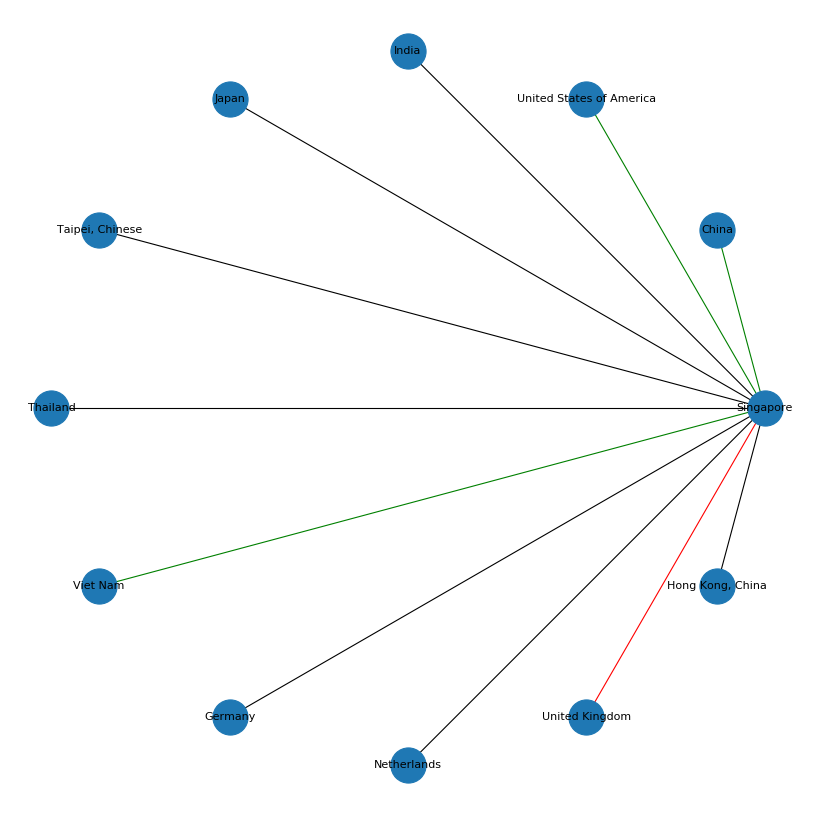

In [46]:
# # SG, 2018 to 2019, Green is negative financial service export from HK 2018-19 AND positive financial service export from SG 2018-19

# count=0
# total=0

# import networkx as nx 
# import matplotlib.pyplot as plt
# import itertools

# from matplotlib.pyplot import figure
# figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

# G = nx.Graph() 
# # G1 = nx.Graph()
# # adj_list = {2: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# # 3: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# # 5: [2, 3, 4, 5, 6, 7, 8, 9]}
# # import matplotlib.pyplot as plt 
# # for i, j in adj_list.items():
# #     for k in j:
# #         G.add_edge(i, k)  

# for index, row in joined_df.iterrows():
#     total+=1
#     G.add_edge("Singapore",row[joined_df.columns[0]], weight=row[joined_df.columns[-1]], color='black')
#     if row[joined_df.columns[-1]]-row[joined_df.columns[-2]]>0:
#         if row[joined_df.columns[10]]-row[joined_df.columns[9]]<=0:
#             G.add_edge("Singapore",row[joined_df.columns[0]], weight=row[joined_df.columns[-1]], color='green')
#             count+=1
#     if row[joined_df.columns[-1]]-row[joined_df.columns[-2]]<=0:
#         if row[joined_df.columns[10]]-row[joined_df.columns[9]]>0:
#             G.add_edge("Singapore",row[joined_df.columns[0]], weight=row[joined_df.columns[-1]], color='red')
# #     else:
# #         G.add_edge("Singapore",row[joined_df.columns[0]], weight=row[joined_df.columns[-1]], color='black')
    
# G.add_edge("Singapore",SG_to_HK.iloc[0,0], weight=SG_to_HK.iloc[0,10], color='black')
# if SG_to_HK.iloc[0,10]-SG_to_HK.iloc[0,9]>0:
#     if HK_to_SG.iloc[0,10]-HK_to_SG.iloc[0,9]<=0:
#         G.add_edge("Singapore",SG_to_HK.iloc[0,0], weight=SG_to_HK.iloc[0,10], color='green')
# if SG_to_HK.iloc[0,10]-SG_to_HK.iloc[0,9]<=0:
#     if HK_to_SG.iloc[0,10]-HK_to_SG.iloc[0,9]>0:
#         G.add_edge("Singapore",SG_to_HK.iloc[0,0], weight=SG_to_HK.iloc[0,10], color='red')
# # G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='red')
    
# # G.add_edge(1,2, weight=1)

# # pos = nx.spring_layout(G, k=0.15,iterations=50)
# pos = nx.circular_layout(G)
# # pos = nx.spring_layout(G, scale=5,k=0.15,iterations=20)   #<<<<<<<<<< Initialize this only once
# # nx.draw(G,pos=pos, with_labels=True, node_size = 1000, font_size=10)  #<<<<<<<<< pass the pos variable
# # plt.draw() 
# # plt.figure() # To plot the next graph in a new figure
# # plt.show()

# edges = G.edges()
# colors = [G[u][v]['color'] for u,v in edges]
# weights = [G[u][v]['weight'] for u,v in edges]

# nx.draw(G, pos=pos, with_labels=True, node_size = 1000, font_size=10, edges=edges, edge_color=colors)

In [46]:
print("Out of the top ", total, " trading partners, SG won over ", count, " of HK's parters")

Out of the top  100  trading partners, SG won over  22  of HK's parters
